# Detect the face and blur it


# Application: News channels use this to hide peoples identity or cover images that might trigger certain people

# create new enviornment
#conda create -n opencv python=3.6

#activate opencv

#pip install opencv-python

#pip install cmake

#conda install -c conda-forge dlib

#pip install --no-dependencies face_recognition

#conda install -c akode face_recognition_models

to slove PIL error
#pip install image

In [9]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import PIL.ImageDraw

In [10]:
img = face_recognition.load_image_file("fr.jpg")
face_loc = face_recognition.face_locations(img)
print(face_loc)

[(219, 1182, 374, 1027), (225, 798, 354, 669), (268, 999, 397, 870), (184, 631, 339, 476), (202, 1388, 356, 1233)]


In [11]:
#The function "shape" returns the shape of an array. The shape is a tuple of integers.
#These numbers denote the lengths of the corresponding array dimension. 
img.shape 

(1280, 1920, 3)

Group Photo
I Found 5 number of face(s) in this photograph


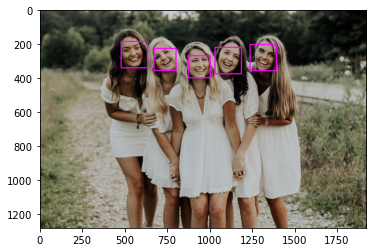

In [12]:
print("Group Photo")
print("I Found {} number of face(s) in this photograph".format(len(face_loc)))
for (x,y,w,h) in face_loc:
    # add boumding box to the image
    #cv2.rectangle(img, startpt, endpt, color, thickness)
    cv2.rectangle(img,(h,w),(y,x),(255,0,255),6)
    
plt.imshow(img)
plt.show() 

# Face Recognition On Live Camera

# For face recognition, the algorithm notes certain important measurements on the face — like the color and size and slant of eyes, the gap between eyebrows, etc. All these put together define the face encoding — the information obtained out of the image — that is used to identify the particular face.

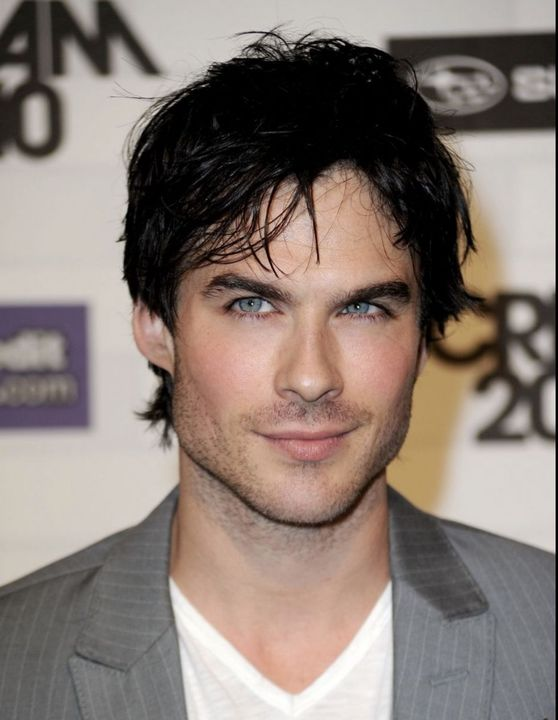

[{'chin': [(173, 304), (173, 340), (175, 377), (177, 413), (187, 446), (212, 474), (240, 498), (272, 521), (305, 527), (335, 521), (359, 496), (381, 469), (399, 442), (408, 411), (415, 379), (420, 347), (422, 314)], 'left_eyebrow': [(200, 290), (219, 276), (244, 276), (268, 282), (291, 292)], 'right_eyebrow': [(336, 295), (358, 288), (379, 283), (401, 284), (414, 299)], 'nose_bridge': [(312, 313), (311, 336), (311, 360), (311, 383)], 'nose_tip': [(286, 396), (297, 400), (309, 405), (321, 401), (331, 395)], 'left_eye': [(233, 308), (246, 299), (263, 301), (277, 312), (261, 314), (244, 314)], 'right_eye': [(339, 314), (353, 303), (369, 303), (382, 312), (370, 316), (354, 316)], 'top_lip': [(258, 435), (278, 432), (296, 430), (309, 433), (322, 429), (337, 430), (351, 432), (343, 435), (322, 439), (309, 441), (295, 440), (267, 438)], 'bottom_lip': [(351, 432), (338, 448), (325, 457), (311, 460), (296, 459), (278, 450), (258, 435), (267, 438), (296, 440), (310, 442), (324, 439), (343, 435)]

In [13]:
ian_img = face_recognition.load_image_file("ian.png")
img=PIL.Image.fromarray(ian_img)
ian_face_encoding = face_recognition.face_encodings(ian_img)[0]
display(img)

face_landmarks_list = face_recognition.face_landmarks(ian_img)
print(face_landmarks_list)

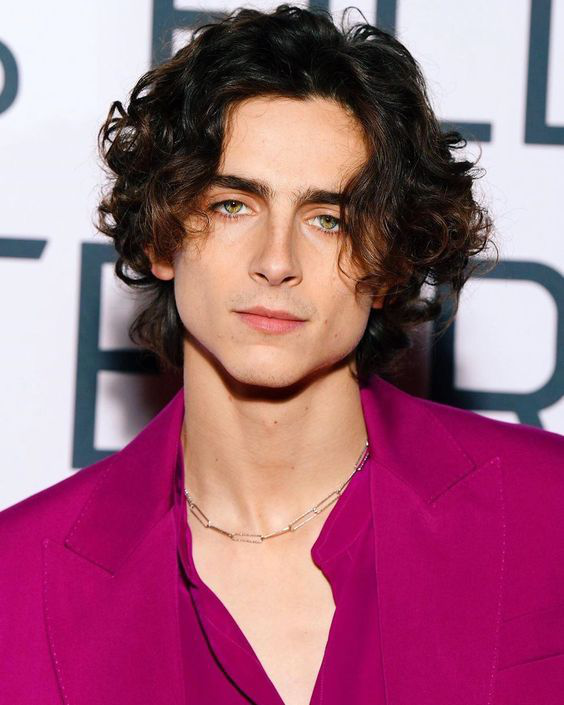

[{'chin': [(176, 216), (173, 244), (172, 272), (174, 299), (182, 324), (198, 345), (216, 363), (236, 380), (262, 387), (289, 386), (314, 374), (338, 361), (357, 344), (369, 321), (374, 295), (380, 268), (384, 241)], 'left_eyebrow': [(196, 189), (211, 178), (232, 176), (252, 181), (270, 192)], 'right_eyebrow': [(297, 197), (317, 192), (337, 193), (354, 199), (366, 213)], 'nose_bridge': [(281, 214), (279, 231), (277, 248), (275, 266)], 'nose_tip': [(255, 278), (263, 283), (272, 288), (282, 285), (292, 282)], 'left_eye': [(217, 209), (229, 204), (243, 205), (253, 214), (240, 216), (227, 215)], 'right_eye': [(307, 221), (319, 217), (332, 219), (341, 227), (330, 229), (318, 226)], 'top_lip': [(232, 313), (249, 310), (263, 307), (272, 312), (282, 311), (293, 316), (307, 323), (301, 322), (281, 319), (271, 318), (261, 316), (240, 315)], 'bottom_lip': [(307, 323), (291, 330), (278, 332), (268, 332), (258, 329), (246, 323), (232, 313), (240, 315), (260, 316), (270, 319), (280, 319), (301, 322)]

In [14]:
tim_img = face_recognition.load_image_file("Tim.jpg")
img=PIL.Image.fromarray(tim_img)
tim_face_encoding = face_recognition.face_encodings(tim_img)[0]
display(img)

face_landmarks_list = face_recognition.face_landmarks(tim_img)
print(face_landmarks_list)

# Applying digital makeup😂

In [8]:
face_landmarks_list = face_recognition.face_landmarks(tim_img)
print(face_landmarks_list)

for face_landmarks in face_landmarks_list:
    pil_image = PIL.Image.fromarray(tim_img)
    d = PIL.ImageDraw.Draw(pil_image, 'RGBA')
    
    
    # Make the eyebrows into a nightmare
    d.line(face_landmarks['left_eyebrow'], fill=(0, 255, 0, 255), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(0, 255, 0, 255), width=5)
    d.polygon(face_landmarks['left_eyebrow'], fill=(0, 0, 0, 255))
    d.polygon(face_landmarks['right_eyebrow'], fill=(0, 0, 0, 255))
    
     # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(10, 0, 0, 255), width=3)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(10, 0, 0, 255), width=3)

     # Gloss the lips
    d.line(face_landmarks['top_lip'], fill=(0, 0, 0, 255), width=10)
    d.line(face_landmarks['bottom_lip'], fill=(0, 0, 0, 255), width=10)

    d.polygon(face_landmarks['bottom_lip'], fill=(255, 0, 0, 255))
    d.polygon(face_landmarks['top_lip'], fill=(255, 0, 0, 255))
    d.line(face_landmarks['top_lip'], fill=(0, 0, 0, 255), width=2)
    d.line(face_landmarks['bottom_lip'], fill=(0, 0, 0, 255), width=2)
    
    display(pil_image)


[{'chin': [(176, 216), (173, 244), (172, 272), (174, 299), (182, 324), (198, 345), (216, 363), (236, 380), (262, 387), (289, 386), (314, 374), (338, 361), (357, 344), (369, 321), (374, 295), (380, 268), (384, 241)], 'left_eyebrow': [(196, 189), (211, 178), (232, 176), (252, 181), (270, 192)], 'right_eyebrow': [(297, 197), (317, 192), (337, 193), (354, 199), (366, 213)], 'nose_bridge': [(281, 214), (279, 231), (277, 248), (275, 266)], 'nose_tip': [(255, 278), (263, 283), (272, 288), (282, 285), (292, 282)], 'left_eye': [(217, 209), (229, 204), (243, 205), (253, 214), (240, 216), (227, 215)], 'right_eye': [(307, 221), (319, 217), (332, 219), (341, 227), (330, 229), (318, 226)], 'top_lip': [(232, 313), (249, 310), (263, 307), (272, 312), (282, 311), (293, 316), (307, 323), (301, 322), (281, 319), (271, 318), (261, 316), (240, 315)], 'bottom_lip': [(307, 323), (291, 330), (278, 332), (268, 332), (258, 329), (246, 323), (232, 313), (240, 315), (260, 316), (270, 319), (280, 319), (301, 322)]

AttributeError: module 'PIL' has no attribute 'ImageDraw'

#  Create arrays of known face encodings and their names

In [15]:
known_face_encodings = [
    ian_face_encoding,
    tim_face_encoding
]
known_face_names = [
    "Ian Somerhalder",
    "Timothee Chalamet"
]

In [16]:
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

In [17]:
# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    
    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]
    
    
    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
        
        face_names = []
        for face_encoding in face_encodings:
            #See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Sorry! You are not Ian nor Tim"
        
             # If a match was found in known_face_encodings, just use it for displaying
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]
                
            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame

    # Display the results
    for (top, right, bottom, left) in face_locations:
        
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4
    
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 255, 0), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
        
       # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  
     
# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()          

# Blur the Face

In [18]:
# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Initialize some variables
face_locations = []

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face detection processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(small_frame, model="hog") #try cnn

    # Display the results
    for top, right, bottom, left in face_locations:
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4
        
         # Extract the region of the image that contains the face
        face_image = frame[top:bottom, left:right]

        # Blur the face image
        face_image = cv2.GaussianBlur(face_image, (99, 99), 30)

        # Put the blurred face region back into the frame image
        frame[top:bottom, left:right] = face_image

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit/ exit from camera
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()